In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

from ROOT import TFile

Welcome to JupyROOT 6.18/02


In [2]:
old_file = TFile('../files/output_fitBToKJPsiMuMu.root', 'READ')
new_file = TFile('../files/output_fitBToKJPsiMuMuNew.root', 'READ')

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [3]:
old_file.ls()

TFile**		../files/output_fitBToKJPsiMuMu.root	
 TFile*		../files/output_fitBToKJPsiMuMu.root	
  KEY: TObjString	tag;1	Collectable string class
  KEY: TTree	Events;1	Events
  KEY: TTree	LuminosityBlocks;1	LuminosityBlocks
  KEY: TTree	Runs;1	Runs
  KEY: TTree	MetaData;1	Job metadata
  KEY: TTree	ParameterSets;1	Parameter sets


In [5]:
old_events = uproot.open('../files/output_fitBToKJPsiMuMu.root')['Events']
new_events = uproot.open('../files/output_fitBToKJPsiMuMuNew.root')['Events']

In [52]:
#old_events.show()

In [7]:
old_events.name, old_events.title, old_events.numentries

(b'Events', b'Events', 1000)

In [8]:
new_events.name, new_events.title, new_events.numentries

(b'Events', b'Events', 1000)

In [126]:
entries = [
    'Muon_*',
    'mm_mu*_index',
    'mm_kin_*',
    'bkmm_kaon_*',
    'bkmm_*',
]

mm_old = old_events.arrays(entries)
mm_new = new_events.arrays(entries)

In [132]:
df = old_events.pandas.df(entries, flatten=False)

entry
0                            [8.649204]
1                           [1.0408192]
2                        [0.0063147396]
3                           [28.508623]
4                           [1.3530192]
                     ...               
995                         [1.0049124]
996                         [1.5634652]
997                      [0.0064942706]
998                       [0.013367745]
999    [0.435996, 24.887074, 10.589654]
Name: mm_kin_vtx_chi2dof, Length: 1000, dtype: object


In [33]:
mm_mass = old_events.array('mm_mass')
mm_mass_new = new_events.array('mm_mass')

Text(0.5, 0, '')

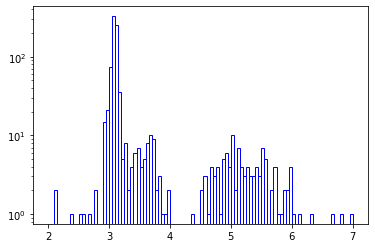

In [46]:
nbins = 100
mass = mm_mass

plt.hist(mass.flatten(),
         bins=nbins, 
         log=True,
         range=(2,7),
         edgecolor='b', 
         color='w')

plt.xlabel('')

Text(0.5, 0, '')

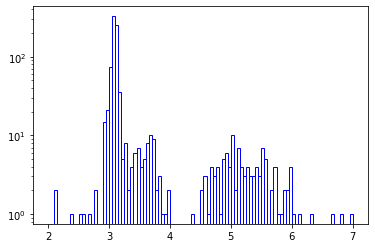

In [47]:
mass = mm_mass_new

plt.hist(mass.flatten(),
         bins=nbins, 
         log=True,
         range=(2,7),
         edgecolor='b', 
         color='w')

plt.xlabel('')

In [ ]:
df = 